# 11. 语言学数据管理

已标注的语言数据的结构化集合在NLP的大部分领域都是至关重要的，但是，我们使用它们仍然面临着许多障碍。本章的目的是要回答下列问题：

1. 我们如何设计一种新的语言资源，并确保它的覆盖面、平衡以及支持广泛用途的文档？
2. 现有数据对某些分析工具格式不兼容，我们如何才能将其转换成合适的格式？
3. 有什么好的方法来记录我们已经创建的资源的存在，让其他人可以很容易地找到它？

一路上，我们将研究当前语料库的设计、创建一个语料库的典型工作流程，及语料库的生命周期。与在其他章节中一样，会有语言数据管理实际实验的很多例子，包括在语言学现场教学课程、实验室的工作和网络爬取中收集的数据。

<a href="#1">1 语料库结构：一个案例研究</a>

<a href="#2-语料库生命周期">2 语料库生命周期</a>

<a href="#3-数据采集">3 数据采集</a>

<a href="#4-使用XML">4 使用XML</a>

<a href="#5-使用Toolbox数据">5 使用Toolbox数据</a>

<a href="#6-使用OLAC元数据描述语言资源">6 使用OLAC元数据描述语言资源</a>

<a href="#7-小结">7 小结</a>

<a href="#8-深入阅读">8 深入阅读</a>

<a href="#9-练习">9 练习</a>

<a id="1"></a>

## 1 语料库结构：一个案例研究

TIMIT语料库是第一个广泛发布的已标注语音数据库，它有一个特别清晰的组织结构。TIMIT由一个包括克萨斯仪器公司和麻省理工学院的财团开发，它也由此得名。它被设计用来为声学-语音知识的获取提供数据，并支持自动语音识别系统的开发和评估。

<a href="#1.1-TIMIT的结构">1.1 TIMIT的结构</a>

<a href="#1.2-主要设计特点">1.2 主要设计特点</a>

<a href="#1.3-基本数据类型">1.3 基本数据类型</a>

**vscode jupyter toc**

<a href="#11-TIMIT的结构">1.1 TIMIT的结构</a>

<a href="#12-主要设计特点">1.2 主要设计特点</a>

<a href="#13-基本数据类型">1.3 基本数据类型</a>

## 1.1 TIMIT的结构

与布朗语料库显示文章风格和来源的平衡选集一样，TIMIT包括方言、说话者和材料的平衡选集。对8个方言区中的每一种方言，具有一定年龄范围和教育背景的50个男性和女性的说话者每人读10个精心挑选的句子。设计中有两句话是所有说话者都读的，带来方言的变化：

In [3]:
import nltk

phonetic = nltk.corpus.timit.phones('dr1-fvmh0/sa1')
phonetic

['h#',
 'sh',
 'iy',
 'hv',
 'ae',
 'dcl',
 'y',
 'ix',
 'dcl',
 'd',
 'aa',
 'kcl',
 's',
 'ux',
 'tcl',
 'en',
 'gcl',
 'g',
 'r',
 'iy',
 's',
 'iy',
 'w',
 'aa',
 'sh',
 'epi',
 'w',
 'aa',
 'dx',
 'ax',
 'q',
 'ao',
 'l',
 'y',
 'ih',
 'ax',
 'h#']

In [2]:
nltk.corpus.timit.word_times('dr1-fvmh0/sa1')

[('she', 7812, 10610),
 ('had', 10610, 14496),
 ('your', 14496, 15791),
 ('dark', 15791, 20720),
 ('suit', 20720, 25647),
 ('in', 25647, 26906),
 ('greasy', 26906, 32668),
 ('wash', 32668, 37890),
 ('water', 38531, 42417),
 ('all', 43091, 46052),
 ('year', 46052, 50522)]

除了这种文本数据，TIMIT还包括一个词典，提供每一个词的可与一个特定的话语比较的规范的发音：

In [3]:
timitdict = nltk.corpus.timit.transcription_dict()
timitdict['greasy'] + timitdict['wash'] + timitdict['water']

['g', 'r', 'iy1', 's', 'iy', 'w', 'ao1', 'sh', 'w', 'ao1', 't', 'axr']

In [4]:
phonetic[17:30]

['g', 'r', 'iy', 's', 'iy', 'w', 'aa', 'sh', 'epi', 'w', 'aa', 'dx', 'ax']

这给了我们一点印象：语音处理系统在处理或识别这种特殊的方言（新英格兰）的语音中必须做什么。最后，TIMIT包括说话人的人口学统计，允许细粒度的研究声音、社会和性别特征。

In [5]:
nltk.corpus.timit.spkrinfo('dr1-fvmh0')

SpeakerInfo(id='VMH0', sex='F', dr='1', use='TRN', recdate='03/11/86', birthdate='01/08/60', ht='5\'05"', race='WHT', edu='BS', comments='BEST NEW ENGLAND ACCENT SO FAR')

## 1.2 主要设计特点

TIMIT演示了语料库设计中的几个主要特点。首先，语料库包含语音和字形两个标注层。一般情况下，文字或语音语料库可能在多个不同的语言学层次标注，包括形态、句法和段落层次。此外，即使在给定的层次仍然有不同的标注策略，甚至标注者之间也会有分歧，因此我们要表示多个版本。TIMIT的第二个特点是：它在多个维度的变化与方言地区和二元音覆盖范围之间取得平衡。人口学统计的加入带来了许多更独立的变量，这可能有助于解释数据中的变化，便于以后出于在建立语料库时没有想到的目的使用语料库，例如社会语言学。第三个特点是：将原始语言学事件作为录音来捕捉和作为标注来捕捉之间有明显的区分。两者一致表示文本语料库正确，原始文本通常有被认为是不可改变的作品的外部来源。那个作品的任何包含人的判断的转换——即使如分词一样简单——也是后来的修订版，因此以尽可能接近原始的形式保留源材料是十分重要的。

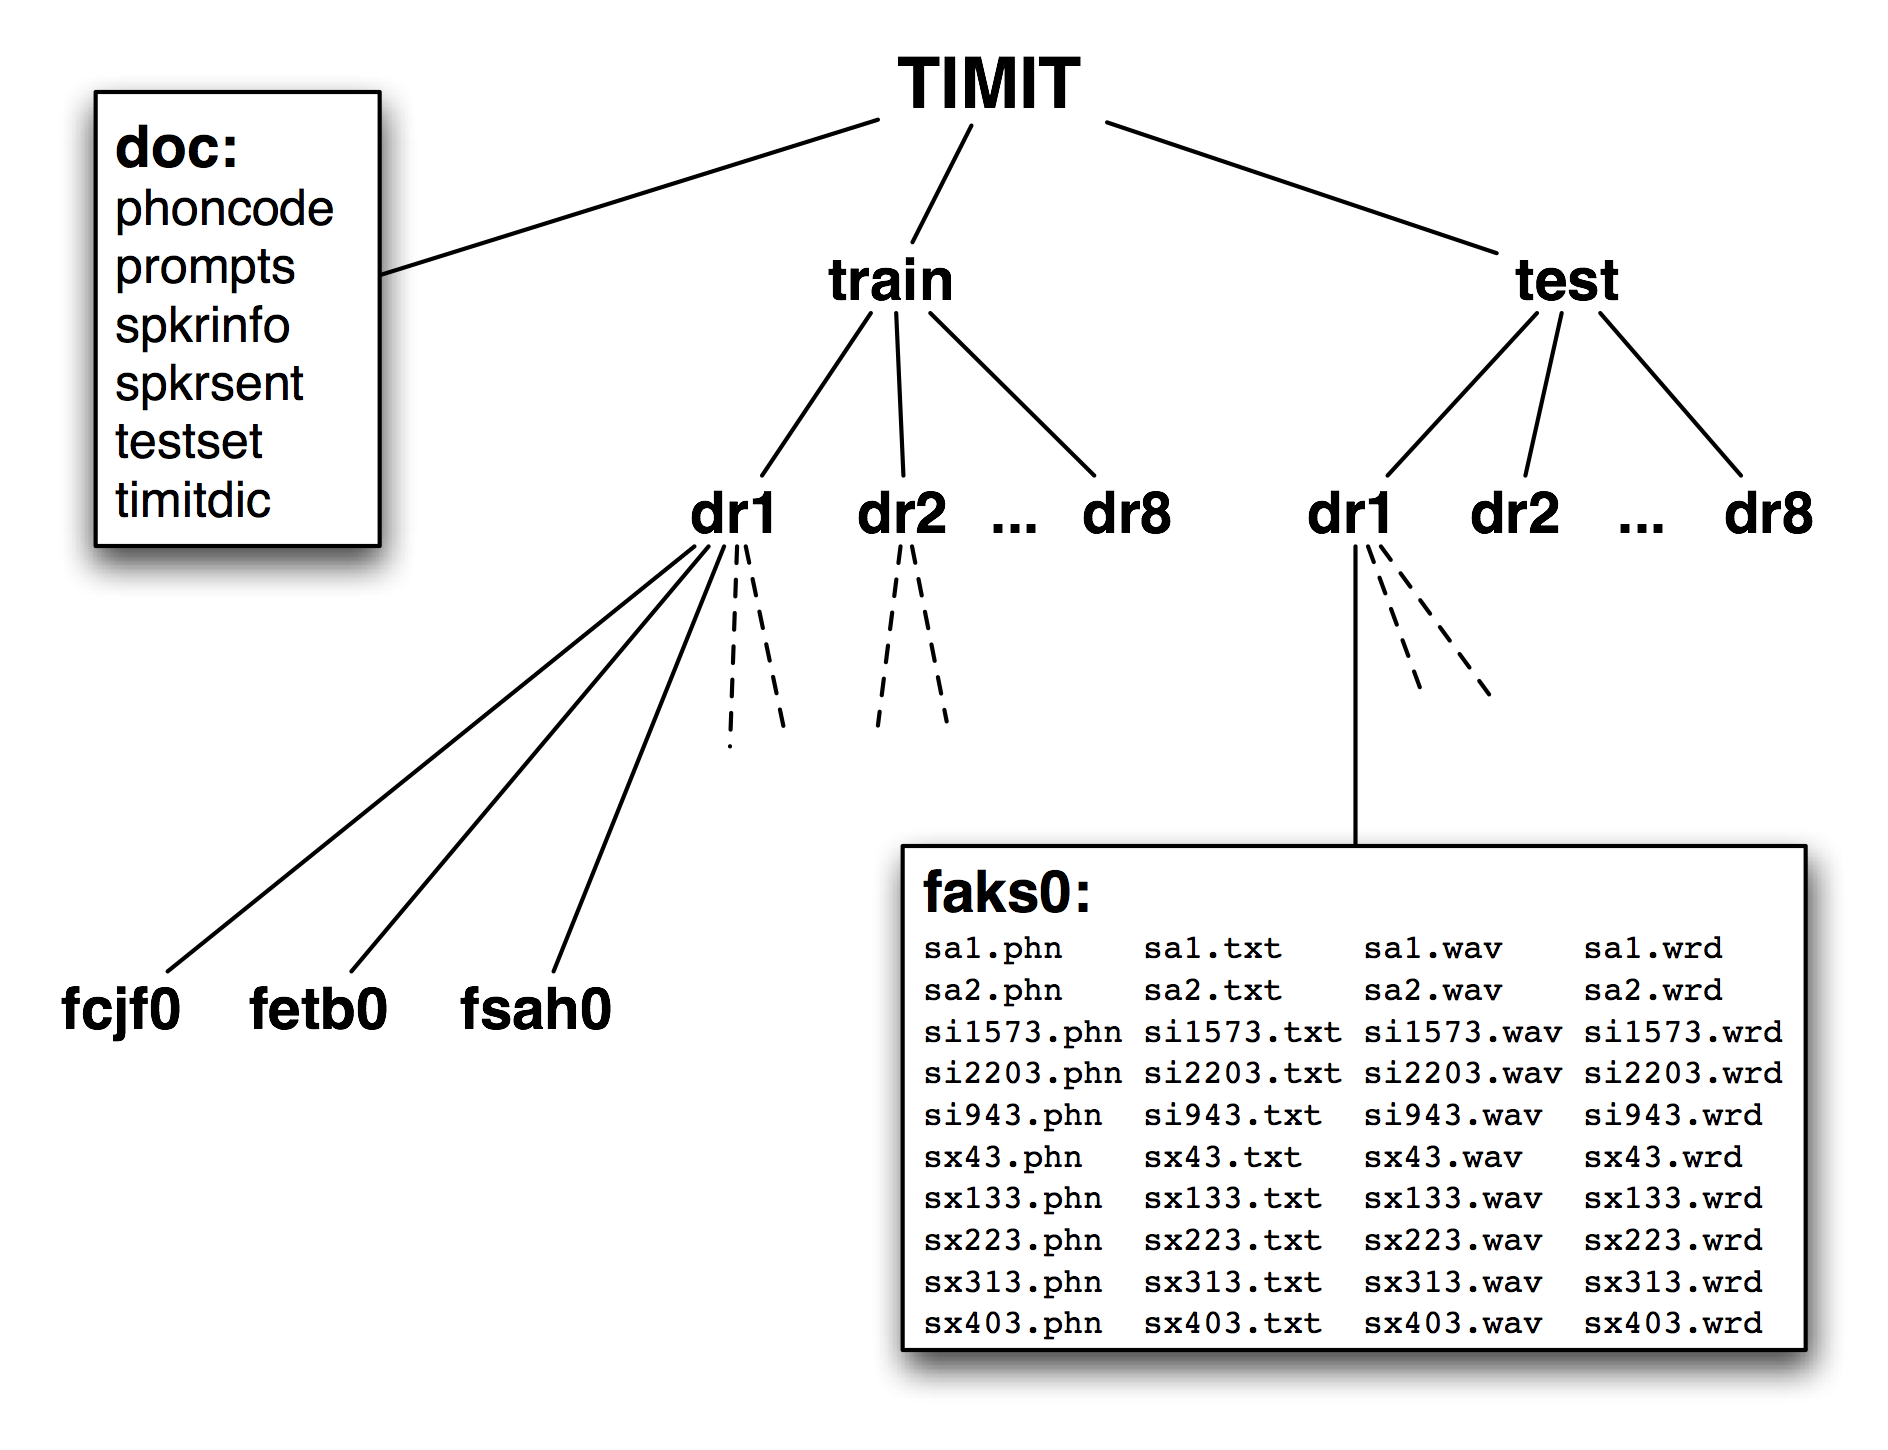

图 1.2：发布的TIMIT语料库的结构：CD-ROM包含文档、顶层的训练和测试目录；训练和测试目录都有8 子目录，每个方言区一个；这些目录又包含更多子目录，每个说话者一个；列出的目录是女性说话者`aks0`的目录的内容，显示10个`wav`文件配以一个录音文本文件、一个录音文本词对齐文件和一个音标文件。

TIMIT的第四个特点是语料库的层次结构。每个句子4个文件，500个说话者每人10个句子，有20,000个文件。这些被组织成一个树状结构，示意图如[1.2](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#fig-timit-structure)所示。在顶层分成训练集和测试集，用于开发和评估统计模型。

最后，请注意虽然TIMIT是语音语料库，它的录音文本和相关数据只是文本，可以使用程序处理了，就像任何其他的文本语料库那样。因此，许多在这本书中所描述的计算方法都适用。此外，注意TIMIT语料库包含的所有数据类型分为词汇和文字两个基本类别，我们将在下面讨论。说话者人口学统计数据只不过是词汇数据类型的另一个实例。

当我们考虑到文字和记录结构是计算机科学中关注数据管理的两个子领域首要内容，即全文检索领域和数据库领域，这最后的观察就不太令人惊讶了。语言数据管理的一个显着特点是往往将这两种数据类型放在一起，可以利用这两个领域的成果和技术。

## 1.3 基本数据类型



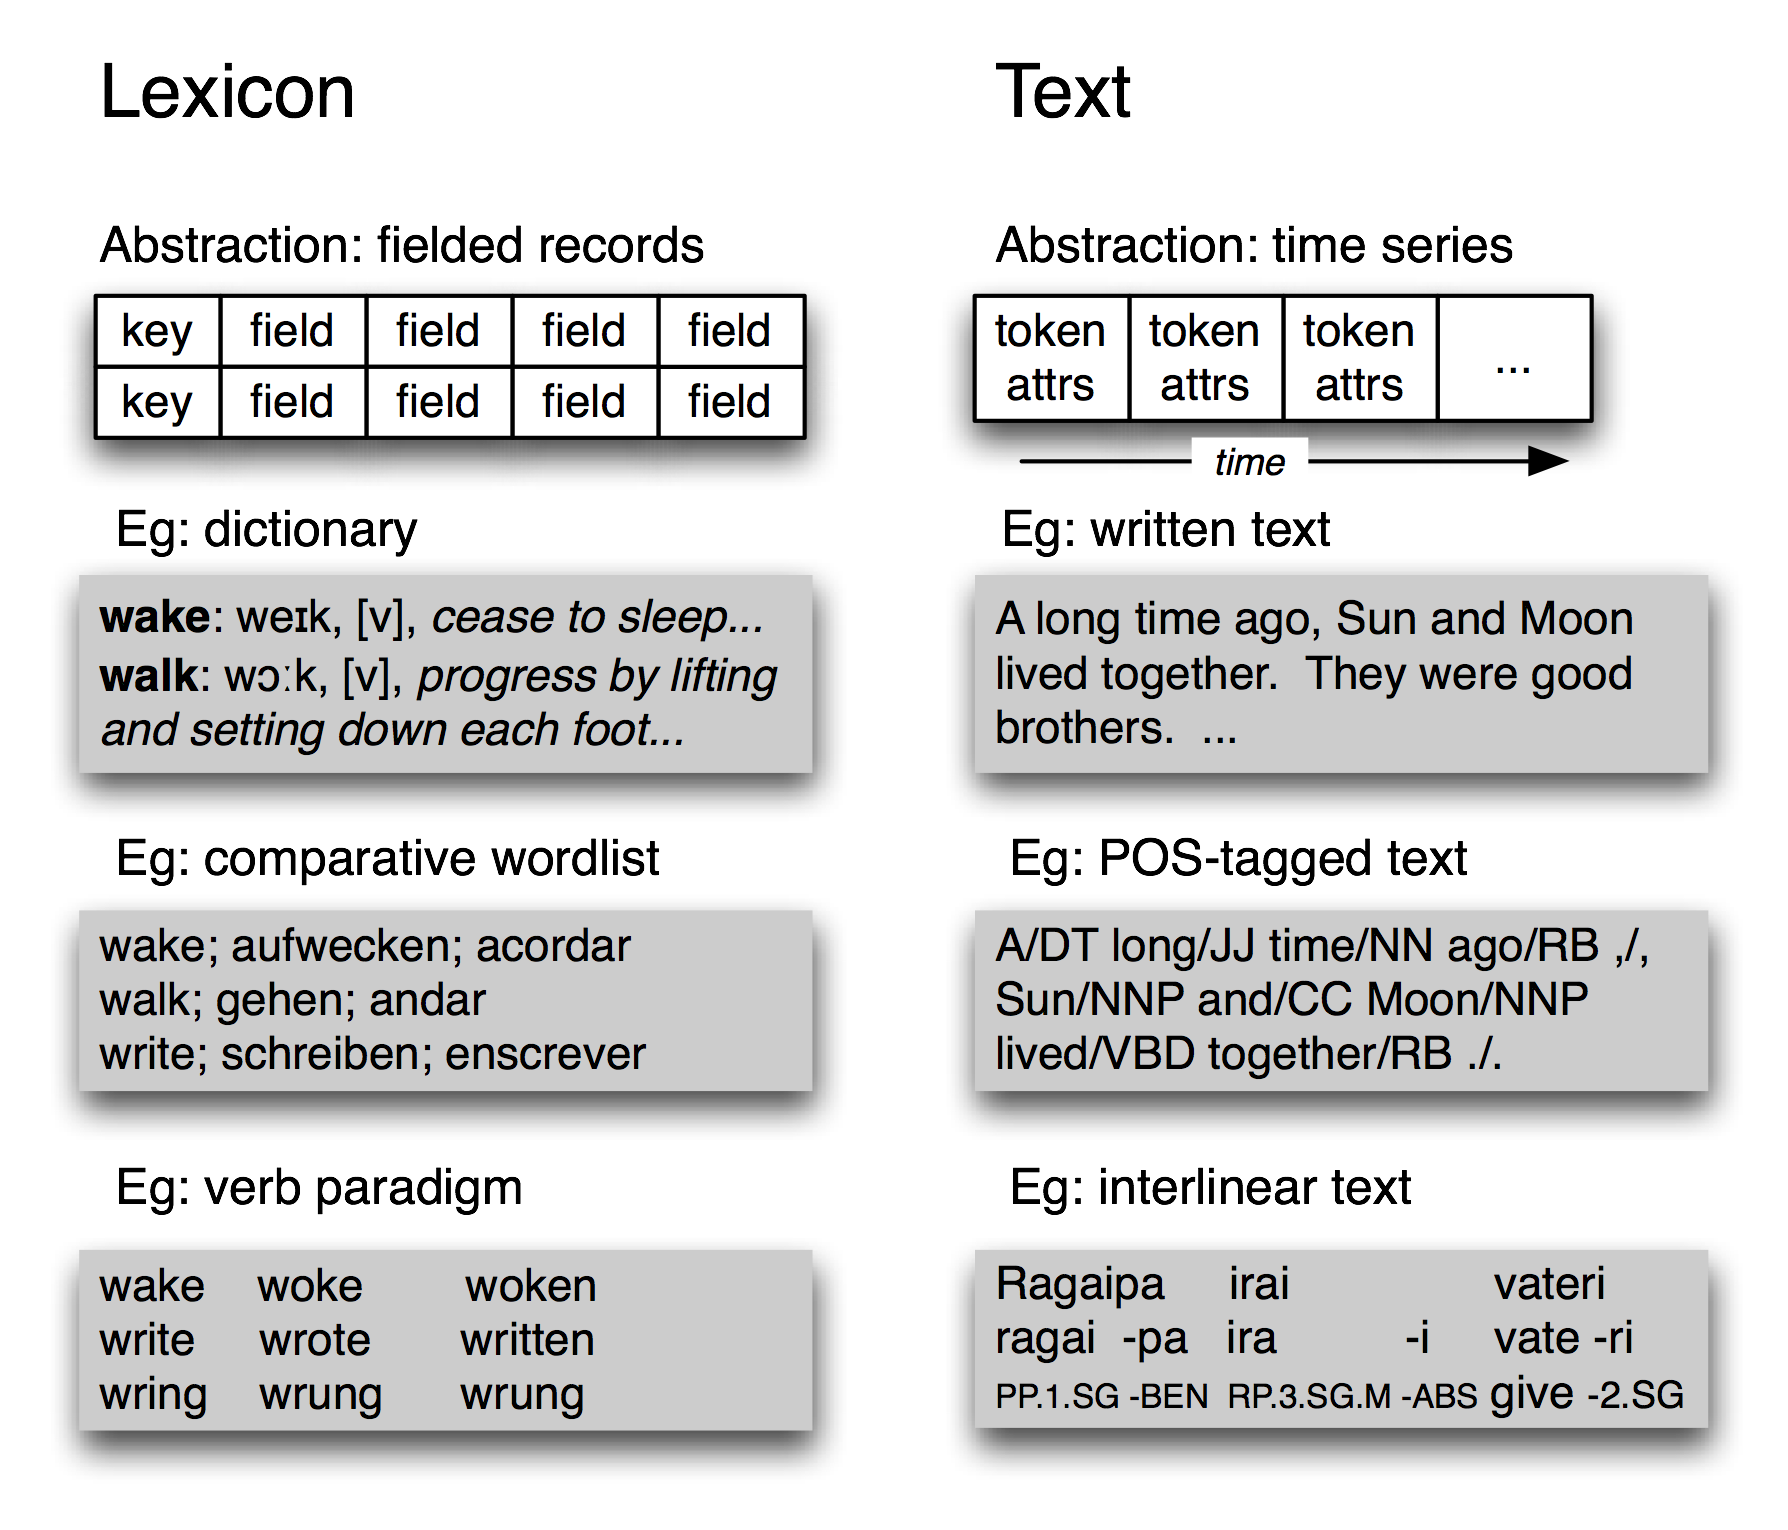

图 1.3：基本语言数据类型——词汇和文本：它们的多样性中，词汇具有记录结构，而已标注文本具有时间组织。

不考虑它的复杂性，TIMIT语料库只包含两种基本数据类型，词典和文本。正如我们在[2.](https://usyiyi.github.io/nlp-py-2e-zh/2.html#chap-corpora)中所看到的，大多数词典资源都可以使用记录结构表示，即一个关键字加一个或多个字段，如[1.3](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#fig-datatypes)所示。词典资源可能是一个传统字典或比较词表，如下所示。它也可以是一个短语词典，其中的关键字是一个短语而不是一个词。词典还包括记录结构化的数据，我们可以通过对应主题的非关键字字段来查找条目。我们也可以构造特殊的表格（称为范例）来进行对比和说明系统性的变化，[1.3](https://usyiyi.github.io/nlp-py-2e-zh/11.html#fig-datatypes)显示了三个动词。TIMIT的说话者表也是一种词典资源。

在最抽象的层面上，文本是一个真实的或虚构的讲话事件的表示，该事件的时间过程也在文本本身存在。一个文本可以是一个小单位，如一个词或句子，也可以是一个完整的叙述或对话。它可能会有标注如词性标记、形态分析、话语结构等。正如我们在IOB 标注（[7.](https://usyiyi.github.io/nlp-py-2e-zh/7.html#chap-chunk)）中所看到的可以使用单个词的标记表示更高层次的成分。因此，[1.3](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#fig-datatypes)所示的文本的抽象就足够了。

不考虑单独的语料库的复杂性和特质，最基本的，它们是带有记录结构化数据的文本集合。语料库的内容往往偏重于这些类型中的一种或多种。例如：布朗语料库包含500个文本文件，但我们仍然可以使用表将这些文件与15种不同风格关联。在事情的另一面，WordNet包含117659个同义词集记录，也包含许多例子句子（小文本）来说明词的用法。TIMIT处在中间，含有大量的独立的文本和词汇类型的材料。

## 2 语料库生命周期

语料库并不是从天而降的，需要精心的准备和许多人长时期的输入。原始数据需要进行收集、清理、记录并以系统化的结构存储。标注可分为各种层次，一些需要语言的形态或句法的专门知识。要在这个阶段成功取决于建立一个高效的工作流程，包括适当的工具和格式转换器。质量控制程序可以将寻找标注中的不一致落实到位，确保尽最大可能在标注者之间达成一致。由于任务的规模和复杂性，大型语料库可能需要几年的准备，包括几十或上百人多年的努力。在本节中，我们简要地回顾语料库生命周期的各个阶段。

<a href="#2.1-语料库创建的三种方案">2.1 语料库创建的三种方案</a>

<a href="#2.2-质星控制">2.2 质星控制</a>

<a href="#2.3-维护与演变">2.3 维护与演变</a>

**vscode jupyter toc**

<a href="#21-语料库创建的三种方案">2.1 语料库创建的三种方案</a>

<a href="#22-质星控制">2.2 质星控制</a>

<a href="#23-维护与演变">2.3 维护与演变</a>

## 2.1 语料库创建的三种方案

语料库的一种类型是设计在创作者的探索过程中逐步展现。这是典型的传统“领域语言学”模式，即来自会话的材料在它被收集的时候就被分析，明天的想法往往基于今天的分析中产生的问题。。在随后几年的研究中产生的语料不断被使用，并可能用作不确定的档案资源。计算机化明显有利于这种类型的工作，以广受欢迎的程序Shoebox为例，它作为Toolbox重新发布，现在已有超过二十年的历史（见[4](https://usyiyi.github.io/nlp-py-2e-zh/2.html#sec-lexical-resources)）。其他的软件工具，甚至是简单的文字处理器和电子表格，通常也可用于采集数据。在下一节，我们将着眼于如何从这些来源提取数据。

另一种语料库创建方案是典型的实验研究，其中一些精心设计的材料被从一定范围的人类受试者中收集，然后进行分析来评估一个假设或开发一种技术。此类数据库在实验室或公司内被共享和重用已很常见，经常被更广泛的发布。这种类型的语料库是“共同任务”的科研管理方法的基础，这在过去的二十年已成为政府资助的语言技术研究项目。在前面的章节中，我们已经遇到很多这样的语料库；我们将看到如何编写Python程序实践这些语料库发布前必要的一些任务。

最后，还有努力为一个特定的语言收集“参考语料”，如*美国国家语料库*（ANC）和*英国国家语料库*（BNC）。这里的目标已经成为产生各种形式、风格和语言的使用的一个全面的记录。除了规模庞大的挑战，还严重依赖自动标注工具和后期编辑共同修复错误。然而，我们可以编写程序来查找和修复错误，还可以分析语料库是否平衡。

## 2.2 质量控制

自动和手动的数据准备的好的工具是必不可少的。然而，一个高质量的语料库的建立很大程度取决于文档、培训和工作流程等平凡的东西。标注指南确定任务并记录标记约定。它们可能会定期更新以覆盖不同的情况，同时制定实现更一致的标注的新规则。在此过程中标注者需要接受训练，包括指南中没有的情况的解决方法。需要建立工作流程，尽可能与支持软件一起，跟踪哪些文件已被初始化、标注、验证、手动检查等等。可能有多层标注，由不同的专家提供。不确定或不一致的情况可能需要裁决。

大的标注任务需要多个标注者，由此产生一致性的问题。一组标注者如何能一致的处理呢？我们可以通过将一部分独立的原始材料由两个人分别标注，很容易地测量标注的一致性。这可以揭示指南中或标注任务的不同功能的不足。在对质量要求较高的情况下，整个语料库可以标注两次，由专家裁决不一致的地方。

报告标注者之间对语料库达成的一致性被认为是最佳实践（如通过两次标注10%的语料库）。这个分数作为一个有用的在此语料库上训练的所有自动化系统的期望性能的上限。

小心！

应谨慎解释标注者之间一致性得分，因为标注任务的难度差异巨大。例如，90％的一致性得分对于词性标注是可怕的得分，但对语义角色标注是可以预期的得分。

Kappa系数K测量两个人判断类别和修正预期的期望一致性的一致性。例如，假设要标注一个项目，四种编码选项可能性相同。这种情况下，两个人随机编码预计有25％可能达成一致。因此，25％一致性将表示为k = 0，相应的较好水平的一致性将依比例决定。对于一个50％的一致性，我们将得到k = 0.333，因为50是从25到100之间距离的三分之一。还有许多其他一致性测量方法；详情请参阅`help(nltk.metrics.agreement)`。



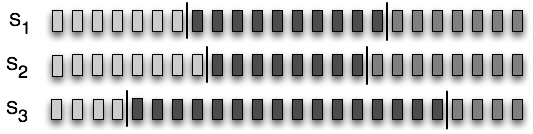

图 2.1：一个序列的三种分割：小矩形代表字、词、句，总之，任何可能被分为语言单位的序列；S1和S2是接近一致的，两者都与S3显著不同。

我们还可以测量语言输入的两个独立分割的一致性，例如分词、句子分割、命名实体识别。在[2.1](https://usyiyi.github.io/nlp-py-2e-zh/11.html#fig-windowdiff)中，我们看到三种可能的由标注者（或程序）产生的项目序列的分割。虽然没有一个完全一致，S1和S2是接近一致的，我们想要一个合适的测量。Windowdiff是评估两个分割一致性的一个简单的算法，通过在数据上移动一个滑动窗口计算近似差错的部分得分。如果我们将词符预处理成0和1的序列，当词符后面跟着边界符号时记录下来，我们就可以用字符串表示分割，应用windowdiff 打分器。

In [6]:
s1 = "00000010000000001000000"
s2 = "00000001000000010000000"
s3 = "00010000000000000001000"
nltk.windowdiff(s1, s1, 3)

0.0

In [7]:
nltk.windowdiff(s1, s2, 3)

0.19047619047619047

In [8]:
nltk.windowdiff(s2, s3, 3)

0.5714285714285714

上面的例子中，窗口大小为3。Windowdiff计算在一对字符串上滑动这个窗口。在每个位置它计算两个字符串在这个窗口内的边界的总数，然后计算差异。最后累加这些差异。我们可以增加或缩小窗口的大小来控制测量的敏感度。

## 2.3 维护与演变

随着大型语料库的发布，研究人员立足于均衡的从为完全不同的目的而创建的语料库中派生出的子集进行调查的可能性越来越大。例如，Switchboard 数据库，最初是为识别说话人的研究而收集的，已被用作语音识别、单词发音、口吃、句法、语调和段落结构研究的基础。重用语言语料库的动机包括希望节省时间和精力，希望在别人可以复制的材料上工作，有时希望研究语言行为的更加自然的形式。为这样的研究选择子集的过程本身可视为一个不平凡的贡献。

除了选择语料库的适当的子集，这个新的工作可能包括重新格式化文本文件（如转换为XML），重命名文件，重新为文本分词，选择数据的一个子集来充实等等。多个研究小组可以独立的做这项工作，如[2.2](https://usyiyi.github.io/nlp-py-2e-zh/11.html#fig-evolution)所示。在以后的日子，应该有人想要组合不同的版本的源数据，这项任务可能会非常繁重。

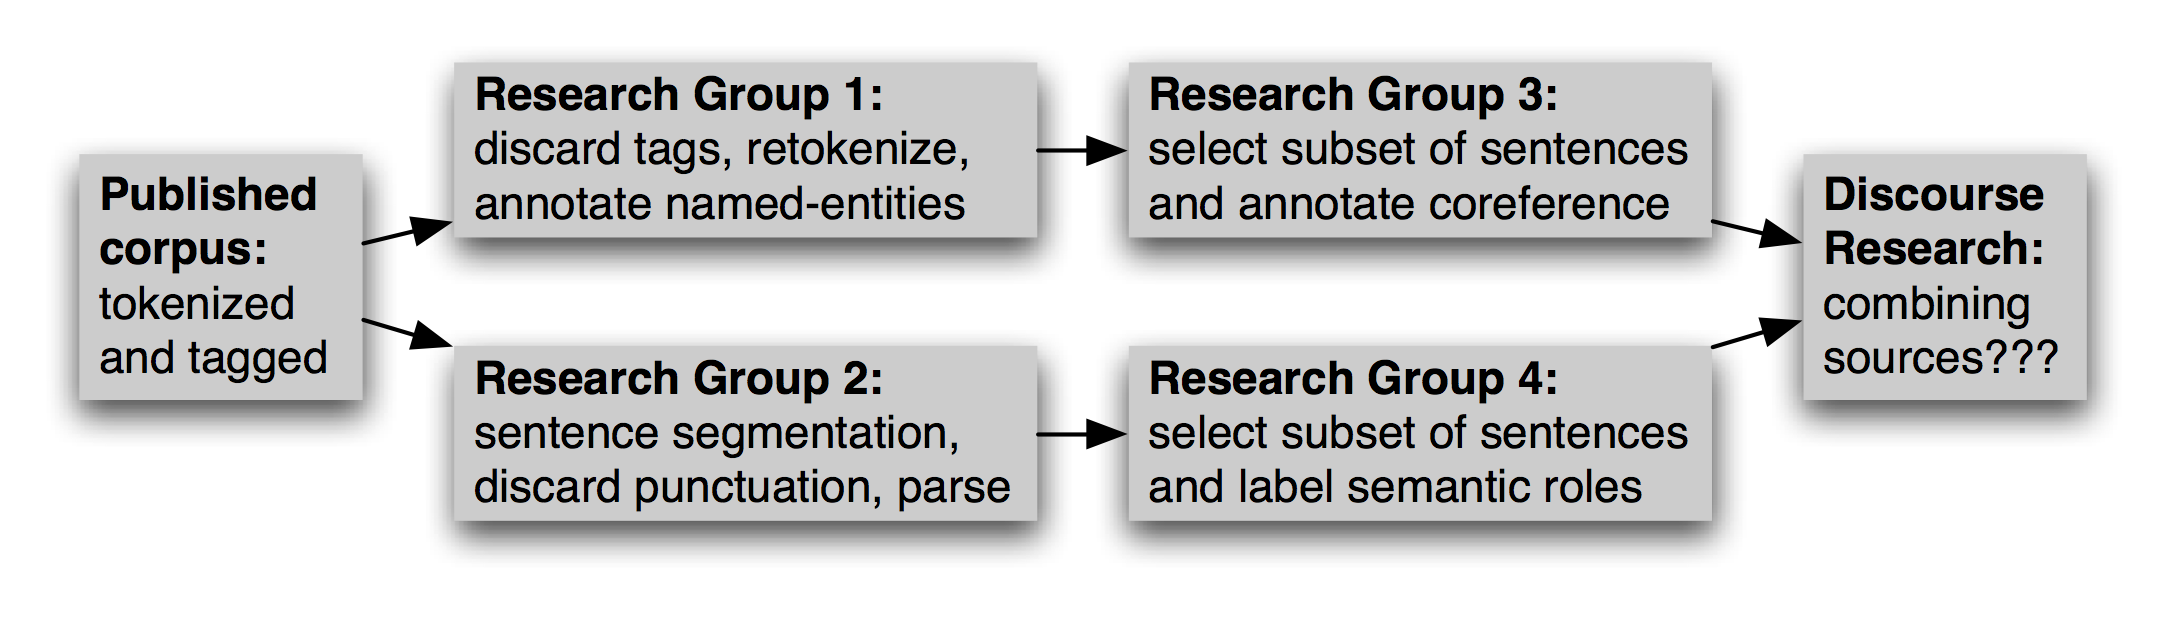

图 2.2：语料库随着时间的推移而演变：语料库发布后，研究小组将独立的使用它，选择和丰富不同的部分；然后研究努力整合单独的标注，面临校准注释的艰巨的挑战。

由于缺乏有关派生的版本如何创建的，哪个版本才是最新的等记录，使用派生的语料库的任务变得更加困难。

这种混乱情况的改进方法是集中维护语料库，专家委员会定期修订和扩充它，考虑第三方的意见，不时发布的新版本。出版字典和国家语料库可能以这种方式集中维护。然而，对于大多数的语料库，这种模式是完全不切实际的。

原始语料库的出版的一个中间过程是要有一个能识别其中任何一部分的规范。每个句子、树、或词条都有一个全局的唯一标识符，每个词符、节点或字段（分别）都有一个相对偏移。标注，包括分割，可以使用规范的标识符（一个被称为对峙注释的方法）引用源材料。这样，新的标注可以与源材料独立分布，同一来源的多个独立标注可以对比和更新而不影响源材料。

如果语料库出版提供了多个版本，版本号或日期可以是识别规范的一部分。整个语料的版本标识符之间的对应表，将使任何对峙的注释更容易被更新。

小心！

有时一个更新的语料包含对一直在外部标注的基本材料的修正。词符可能会被分拆或合并，成分可能已被重新排列。新老标识符之间可能不会一一对应。使对峙标注打破新版本的这些组件比默默允许其标识符指向不正确的位置要好。

## 3 数据采集

<a href="#3.1-从网上获取数据">3.1 从网上获取数据</a>

<a href="#3.2-从字处理器文件获取数据">3.2 从字处理器文件获取数据</a>

<a href="#3.3-从电子表格和数据库中获取数据">3.3 从电子表格和数据库中获取数据</a>

<a href="#3.4-转换数据格式">3.4 转换数据格式</a>

<a href="#3.5-决定要包含的标注层">3.5 决定要包含的标注层</a>

<a href="#3.6-标准和工具">3.6 标准和工具</a>

<a href="#3.7-处理濒危语言时特别注意事项">3.7 处理濒危语言时特别注意事项</a>

**vscode jupyter toc**

<a href="#31-从网上获取数据">3.1 从网上获取数据</a>

<a href="#32-从字处理器文件获取数据">3.2 从字处理器文件获取数据</a>

<a href="#33-从电子表格和数据库中获取数据">3.3 从电子表格和数据库中获取数据</a>

<a href="#34-转换数据格式">3.4 转换数据格式</a>

<a href="#35-决定要包含的标注层">3.5 决定要包含的标注层</a>

<a href="#36-标准和工具">3.6 标准和工具</a>

<a href="#37-处理濒危语言时特别注意事项">3.7 处理濒危语言时特别注意事项</a>

## 3.1 从网上获取数据

网络是语言分析的一个丰富的数据源。我们已经讨论了访问单个文件，如RSS 订阅、搜索引擎的结果（见[3.1](https://usyiyi.github.io/nlp-py-2e-zh/3.html#sec-accessing-text)）的方法。然而，在某些情况下，我们要获得大量的Web文本。

最简单的方法是获得出版的网页文本的文集。Web语料库ACL特别兴趣组（SIGWAC）在`http://www.sigwac.org.uk/`维护一个资源列表。使用定义好的Web 语料库的优点是它们有文档、稳定并允许重复性实验。

如果所需的内容在一个特定的网站，有许多实用程序能捕获网站的所有可访问内容，如*GNU Wget* `http://www.gnu.org/software/wget/`。For maximal flexibility and control, a web crawler can be used, such as *Heritrix* `http://crawler.archive.org/`. 为了最大的灵活性和可控制，可以使用网络爬虫如[(Croft, Metzler, & Strohman, 2009)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#croft2009)。例如：如果我们要编译双语文本集合，对应两种语言的文档对，爬虫需要检测站点的结构以提取文件之间的对应关系，它需要按照捕获的对应方式组织下载的页面。写你自己的网页爬虫可能使很有诱惑力的，但也有很多陷阱需要克服，如检测MIME类型、转换相对地址为绝对URL、避免被困在循环链接结构、处理网络延迟、避免使站点超载或被禁止访问该网站等。

## 3.2 从字处理器文件获取数据

文字处理软件通常用来在具有有限的可计算基础设施的项目中手工编制文本和词汇。这些项目往往提供数据录入模板，通过字处理软件并不能保证数据结构正确。例如，每个文本可能需要有一个标题和日期。同样，每个词条可能有一些必须的字段。随着数据规模和复杂性的增长，用于维持其一致性的时间的比重也增大。

我们怎样才能提取这些文件的内容，使我们能够在外部程序中操作？此外，我们如何才能验证这些文件的内容，以帮助作者创造结构良好的数据，在原始的创作过程中最大限度提高数据的质量？

考虑一个字典，其中的每个条目都有一个词性字段，从一个20个可能值的集合选取，在发音字段显示，以11号黑体字呈现。传统的文字处理器没有能够验证所有的词性字段已正确输入和显示的搜索函数或宏。这个任务需要彻底的手动检查。如果字处理器允许保存文档为一种非专有的格式，如text、HTML或XML，有时我们可以写程序自动做这个检查。

思考下面的一个词条的片段：“sleep [sli:p] **v.i.***condition of body and mind...*"。我们可以在MSWord中输入这些词，然后“另存为网页”，然后检查生成的HTML文件：

```
<p class=MsoNormal>sleep
  <span style='mso-spacerun:yes'> </span>
  [<span class=SpellE>sli:p</span>]
  <span style='mso-spacerun:yes'> </span>
  <b><span style='font-size:11.0pt'>v.i.</span></b>
  <span style='mso-spacerun:yes'> </span>
  <i>a condition of body and mind ...<o:p></o:p></i>
</p>
```

这个简单的程序只是冰山一角。我们可以开发复杂的工具来检查字处理器文件的一致性，并报告错误，使字典的维护者可以*使用原来的文字处理器*纠正的原始文件。

只要我们知道数据的正确格式，就可以编写其他程序将数据转换成不同格式。[3.1](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#code-html2csv)中的程序使用`nltk.clean_html()`剥离HTML标记，提取词和它们的发音，以“逗号分隔值”（CSV）格式生成输出。

In [9]:
from bs4 import BeautifulSoup

def lexical_data(html_file, encoding="utf-8"):
    SEP = '_ENTRY'
    html = open(html_file, encoding=encoding).read()
    html = re.sub(r'<p', SEP + '<p', html)
    text = BeautifulSoup(html).get_text()
    text = ' '.join(text.split())
    for entry in text.split(SEP):
        if entry.count(' ') > 2:
            yield entry.split(' ', 3)

- with gzip.open(fn+".gz","wb") as f_out:

  f_out.write(bytes(s, 'UTF-8'))

注意

更多HTML复杂的处理可以使用`http://www.crummy.com/software/BeautifulSoup/`上的*Beautiful Soup*的包。

## 3.3 从电子表格和数据库中获取数据

电子表格通常用于获取词表或范式。例如，一个比较词表可以用电子表格创建，用一排表示每个同源组，每种语言一列（见`nltk.corpus.swadesh`和`www.rosettaproject.org`）。大多数电子表格软件可以将数据导出为CSV格式。正如我们将在下面看到的，使用`csv`模块Python程序可以很容易的访问它们。

有时词典存储在一个完全成熟的关系数据库。经过适当的标准化，这些数据库可以确保数据的有效性。例如，我们可以要求所有词性都来自指定的词汇，通过声明词性字段为*枚举类型*或用一个外键引用一个单独的词性表。然而，关系模型需要提前定义好的数据（模式）结构，这与高度探索性的构造语言数据的主导方法相违背。被认为是强制性的和独特的字段往往需要是可选的、可重复。只有当数据类型提前全都知道时关系数据库才是适用的，如果不是，或者几乎所有的属性都是可选的或重复的，关系的做法就行不通了。

然而，当我们的目标只是简单的从数据库中提取内容时，完全可以将表格（或SQL查询结果）转换成CSV格式，并加载到我们的程序中。我们的程序可能会执行不太容易用SQL表示的语言学目的的查询，如*select all words that appear in example sentences for which no dictionary entry is provided*。对于这个任务，我们需要从记录中提取足够的信息，使它连同词条和例句能被唯一的识别。让我们假设现在这个信息是在一个CSV文件`dict.csv`中：

```
"sleep","sli:p","v.i","a condition of body and mind ..."
"walk","wo:k","v.intr","progress by lifting and setting down each foot ..."
"wake","weik","intrans","cease to sleep"
```

In [40]:
import csv
lexicon = csv.reader(open('dict.csv')) # 该文件内容如上，可自己创建，或者在仓库 asset/ 下载
pairs = [(lexeme, defn) for (lexeme, _, _, defn) in lexicon]
lexemes, defns = zip(*pairs)
defn_words = set(w for defn in defns for w in defn.split())
sorted(defn_words.difference(lexemes))

['...',
 'a',
 'and',
 'body',
 'by',
 'cease',
 'condition',
 'down',
 'each',
 'foot',
 'lifting',
 'mind',
 'of',
 'progress',
 'setting',
 'to']

然后，这些信息将可以指导正在进行的工作来丰富词汇和更新关系数据库的内容。

## 3.4 转换数据格式

已标注语言数据很少以最方便的格式保存，往往需要进行各种格式转换。字符编码之间的转换已经讨论过（见[3.3](https://usyiyi.github.io/nlp-py-2e-zh/3.html#sec-unicode)）。在这里，我们专注于数据结构。

最简单的情况，输入和输出格式是同构的。例如，我们可能要将词汇数据从Toolbox格式转换为XML，可以直接一次一个的转换词条（[4](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#sec-working-with-xml)）。数据结构反映在所需的程序的结构中：一个`for`循环，每次循环处理一个词条。

另一种常见的情况，输出是输入的摘要形式，如一个倒置的文件索引。有必要在内存中建立索引结构（见[4.8](https://usyiyi.github.io/nlp-py-2e-zh/4.html#code-search-documents)），然后把它以所需的格式写入一个文件。下面的例子构造一个索引，映射字典定义的词汇到相应的每个词条 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#map-word-lexeme)的语意 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#lexical-entry)，已经对定义文本分词 [# 3](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#definition-text)，并丢弃短词 [# 4](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#short-words)。一旦该索引建成，我们打开一个文件，然后遍历索引项，以所需的格式输出行 [# 5](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#required-format)。

In [41]:
idx = nltk.Index((defn_word, lexeme) # 1
                 for (lexeme, defn) in pairs # 2
                 for defn_word in nltk.word_tokenize(defn) # 3
                 if len(defn_word) > 3) # 4
with open("dict.idx", "w") as idx_file:
    for word in sorted(idx):
        idx_words = ', '.join(idx[word])
        idx_line = "{}: {}".format(word, idx_words) # 5
        print(idx_line, file=idx_file)

由此产生的文件`dict.idx`包含下面的行。（如果有更大的字典，我们希望找到每个索引条目中列出的多个语意）。

```
body: sleep
cease: wake
condition: sleep
down: walk
each: walk
foot: walk
lifting: walk
mind: sleep
progress: walk
setting: walk
sleep: wake
```

## 3.5 决定要包含的标注层

发布的语料库中所包含的信息的丰富性差别很大。语料库最低限度通常会包含至少一个声音或字形符号的序列。事情的另一面，一个语料库可以包含大量的信息，如句法结构、形态、韵律、每个句子的语义、加上段落关系或对话行为的标注。标注的这些额外的层可能正是有人执行一个特定的数据分析任务所需要的。例如，如果我们可以搜索特定的句法结构，找到一个给定的语言模式就更容易；如果每个词都标注了意义，为语言模式归类就更容易。这里提供一些常用的标注层：

- 分词：文本的书写形式不能明确地识别它的词符。分词和规范化的版本作为常规的正式版本的补充可能是一个非常方便的资源。
- 断句：正如我们在[3](https://usyiyi.github.io/nlp-py-2e-zh/3.html#chap-words)中看到的，断句比它看上去的似乎更加困难。因此，一些语料库使用明确的标注来断句。
- 分段：段和其他结构元素（标题，章节等）可能会明确注明。
- 词性：文档中的每个单词的词类。
- 句法结构：一个树状结构，显示一个句子的组成结构。
- 浅层语义：命名实体和共指标注，语义角色标签。
- 对话与段落：对话行为标记，修辞结构

不幸的是，现有的语料库之间在如何表示标注上并没有多少一致性。然而，两个大类的标注表示应加以区别。内联标注通过插入带有标注信息的特殊符号或控制序列修改原始文档。例如，为文档标注词性时，字符串`"fly"`可能被替换为字符串`"fly/NN"`来表示词*fly*在文中是名词。相比之下，对峙标注不修改原始文档，而是创建一个新的文档，通过使用指针引用原始文档来增加标注信息。例如，这个新的文档可能包含字符串`"<token id=8 pos='NN'/>"`，表示8号词符是一个名词。（我们希望可以确保的分词本身不会变化，因为它会导致默默损坏这种引用。）

## 3.6 标准和工具

一个用途广泛的语料库需要支持广泛的格式。然而，NLP研究的前沿需要各种新定义的没有得到广泛支持的标注。一般情况下，并没有广泛使用的适当的创作、发布和使用语言数据的工具。大多数项目都必须制定它们自己的一套工具，供内部使用，这对缺乏必要的资源的其他人没有任何帮助。此外，我们还没有一个可以胜任的普遍接受的标准来表示语料库的结构和内容。没有这样的标准，就不可能有通用的工具——同时，没有可用的工具，适当的标准也不太可能被开发、使用和接受。

针对这种情况的一个反应就是开拓未来开发一种通用的能充分表现捕获多种标注类型（见[8](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#sec-further-reading-data)的例子）的格式。NLP的挑战是编写程序处理这种格式的泛化。例如，如果编程任务涉及树数据，文件格式允许任意有向图，那么必须验证输入数据检查树的属性如根、连通性、无环。如果输入文件包含其他层的标注，该程序将需要知道数据加载时如何忽略它们，将树数据保存到文件时不能否定或抹杀这些层。

另一种反应一直是写一个一次性的脚本来操纵语料格式；这样的脚本将许多NLP研究人员的文件夹弄得乱七八糟。在语料格式解析工作应该只进行一次（每编程语言）的前提下，NLTK中的语料库阅读器是更系统的方法。

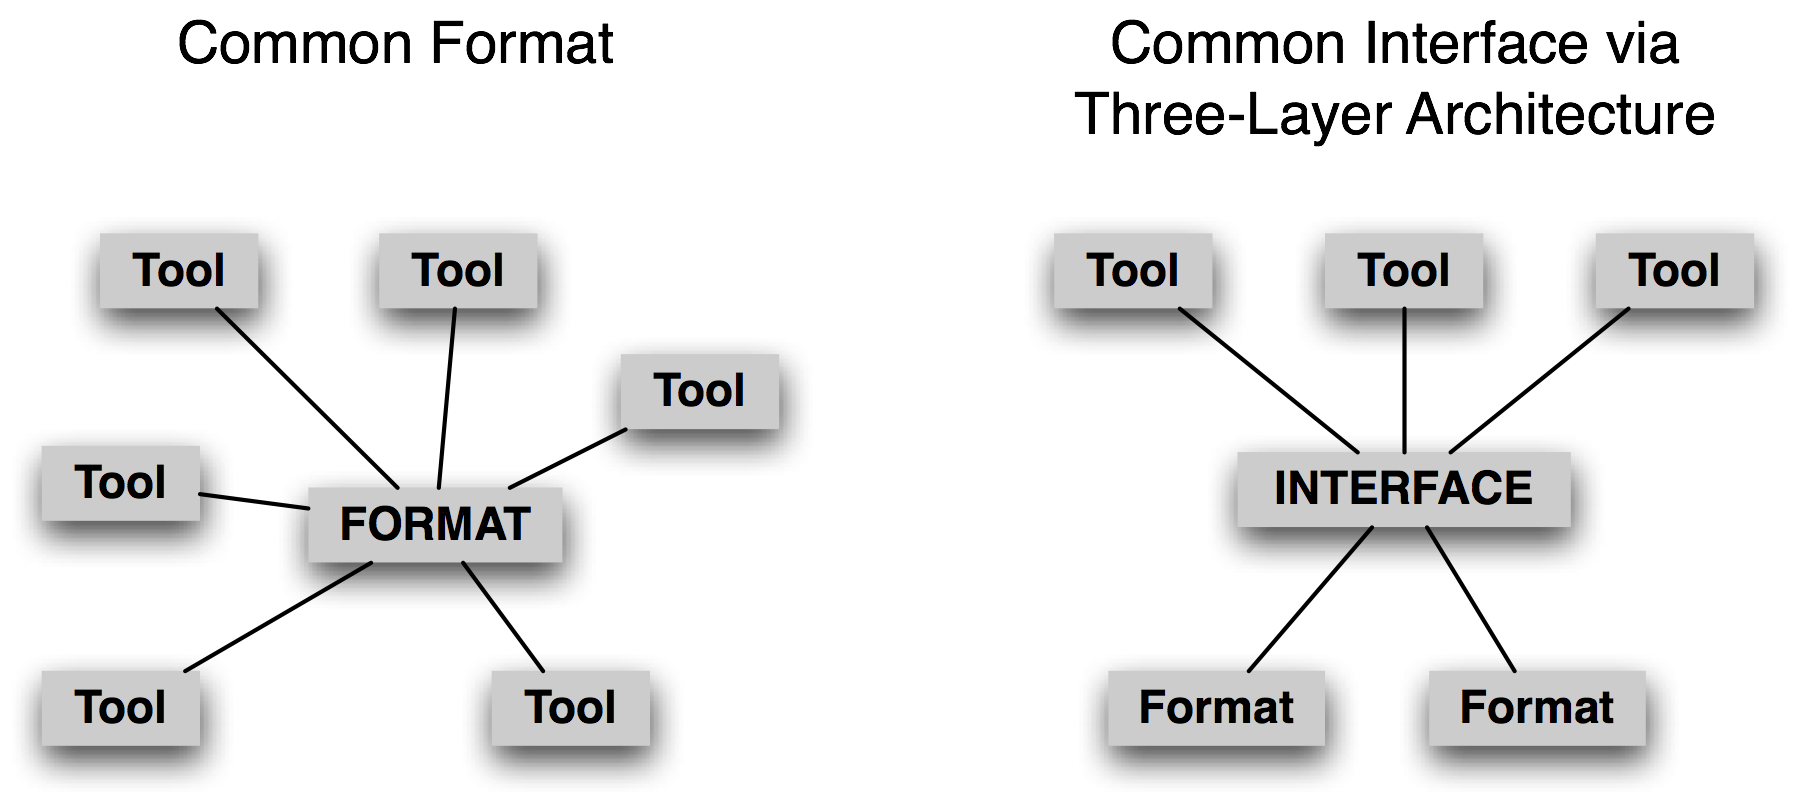

图 3.2：通用格式对比通用接口

不是集中在一种共同的格式，我们认为更有希望开发一种共同的接口（参见`nltk.corpus`）。思考NLP中的一个重要的语料类型treebanks的情况。将短语结构树存储在一个文件中的方法很多。我们可以使用嵌套的括号、或嵌套的XML元素、或每行带有一个(child-id,parent-id)对的依赖符号、或一个XML版本的依赖符号等。然而，每种情况中的逻辑结构几乎是相同的。很容易设计一种共同的接口，使应用程序员编写代码使用如`children()`、`leaves()`、`depth()`等方法来访问树数据。注意这种做法来自计算机科学中已经接受的做法，即即抽象数据类型、面向对象设计、三层结构（[3.2](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#fig-three-layer-arch)）。其中的最后一个——来自关系数据库领域——允许终端用户应用程序使用通用的模型（“关系模型”）和通用的语言（SQL）抽象出文件存储的特质，并允许新的文件系统技术的出现，而不会干扰到终端用户的应用。以同样的方式，一个通用的语料库接口将应用程序从数据格式隔离。

在此背景下，创建和发布一个新的语料库时，尽可能使用现有广泛使用的格式是权宜之计。如果这样不可能，语料库可以带有一些软件——如`nltk.corpus`模块——支持现有的接口方法。

## 3.7 处理濒危语言时特别注意事项

语言对科学和艺术的重要性体现在文化宝库包含在语言中。世界上大约7000 种人类语言中的每一个都是丰富的，在它独特的方面，在它口述的历史和创造的传说，在它的文法结构和它的变化的词汇和它们含义中的细微差别。受威胁残余文化中的词能够区分具有科学家未知的治疗用途的植物亚种。当人们互相接触，每个人都为之前的语言提供一个独特的窗口，语言随着时间的推移而变化。世界许多地方，小的语言变化从一个镇都另一个镇，累加起来在一个半小时的车程的空间中成为一种完全不同的语言。对于其惊人的复杂性和多样性，人类语言犹如丰富多彩的挂毯随着时间和空间而伸展。

然而，世界上大多数语言面临灭绝。对此，许多语言学家都在努力工作，记录语言，构建这个世界语言遗产的重要方面的丰富记录。在NLP的领域能为这方面的努力提供什么帮助吗？开发标注器、分析器、命名实体识别等不是最优先的，通常没有足够的数据来开发这样的工具。相反，最经常提出的是需要更好的工具来收集和维护数据，特别是文本和词汇。

从表面看，开始收集濒危语言的文本应该是一件简单的事情。即使我们忽略了棘手的问题，如谁拥有文本，文本中包含的文化知识有关敏感性，转录仍然有很多明显的实际问题。大多数语言缺乏标准的书写形式。当一种语言没有文学传统时，拼写和标点符号的约定也没有得到很好的建立。因此，通常的做法是与文本收集一道创建一个词典，当在文本中出现新词时不断更新词典。可以使用文字处理器（用于文本）和电子表格（用于词典）来做这项工作。更妙的是，SIL的自由语言软件Toolbox和Fieldworks对文本和词汇的创建集成提供了很好的支持。

当濒危语言的说话者学会自己输入文本时，一个共同的障碍就是对正确的拼写的极度关注。有一个词典大大有助于这一进程，但我们需要让查找的方法不要假设有人能确定任意一个词的引文形式。这个问题对具有复杂形态的包括前缀的语言可能是很急迫的。这种情况下，使用语义范畴标注词项，并允许通过语义范畴或注释查找是十分有益的。

允许通过相似的发音查找词项也是很有益的。下面是如何做到这一点的一个简单的演示。第一步是确定易混淆的字母序列，映射复杂的版本到更简单的版本。我们还可以注意到，辅音群中字母的相对顺序是拼写错误的一个来源，所以我们将辅音字母顺序规范化。

In [13]:
import re

mappings = [('ph', 'f'), ('ght', 't'), ('^kn', 'n'), ('qu', 'kw'),
            ('[aeiou]+', 'a'), (r'(.)\1', r'\1')]
def signature(word):
    for patt, repl in mappings:
        word = re.sub(patt, repl, word)
    pieces = re.findall('[^aeiou]+', word)
    return ''.join(char for piece in pieces for char in sorted(piece))[:8]
signature('illefent')

'lfnt'

In [14]:
signature('ebsekwieous')

'bskws'

In [15]:
signature('nuculerr')

'nclr'

下一步，我们对词典中的所有词汇创建从特征到词汇的映射。我们可以用这为一个给定的输入词找到候选的修正（但我们必须先计算这个词的特征）。

In [16]:
signatures = nltk.Index((signature(w), w) for w in nltk.corpus.words.words())
signatures[signature('nuculerr')]

['anicular',
 'inocular',
 'nucellar',
 'nuclear',
 'unicolor',
 'uniocular',
 'unocular']

最后，我们应该按照与原词相似程度对结果排序。通过函数`rank()`完成。唯一剩下的函数提供给用户一个简单的接口：

In [17]:
def rank(word, wordlist):
    ranked = sorted((nltk.edit_distance(word, w), w) for w in wordlist)
    return [word for (_, word) in ranked]
def fuzzy_spell(word):
    sig = signature(word)
    if sig in signatures:
        return rank(word, signatures[sig])
    else:
        return []
fuzzy_spell('illefent')
fuzzy_spell('ebsekwieous')
fuzzy_spell('nucular')

['anicular',
 'inocular',
 'nucellar',
 'nuclear',
 'unocular',
 'uniocular',
 'unicolor']

这仅仅是一个演示，其中一个简单的程序就可以方便的访问语言书写系统可能不规范或语言的使用者可能拼写的不是很好的上下文中的词汇数据。其他简单的NLP在这个领域的应用包括：建立索引以方便对数据的访问，从文本中拾取词汇表，构建词典时定位词语用法的例子，在知之甚少的数据中检测普遍或特殊模式，并在创建的数据上使用各种语言的软件工具执行专门的验证。我们将在[5](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#sec-working-with-toolbox-data)返回到其中的最后一个。

## 4 使用XML

可扩展标记语言（XML）为设计特定领域的标记语言提供了一个框架。它有时被用于表示已标注的文本和词汇资源。不同于HTML的标签是预定义的，XML允许我们组建自己的标签。不同于数据库，XML允许我们创建的数据而不必事先指定其结构，它允许我们有可选的、可重复的元素。在本节中，我们简要回顾一下XML的一些与表示语言数据有关的特征，并说明如何使用Python程序访问XML文件中存储的数据。

<a href="#4.1-语言结构中使用XML">4.1 语言结构中使用XML</a>

<a href="#4.2-XML的作用">4.2 XML的作用</a>

<a href="#4.3-ElementTree接口">4.3 ElementTree接口</a>

<a href="#4.4-使用ElementTree访问Toolbox数据">4.4 使用ElementTree访问Toolbox数据</a>

<a href="#4.5-格式化条目">4.5 格式化条目</a>

**vscode jupyter toc**

<a href="#41-语言结构中使用XML">4.1 语言结构中使用XML</a>

<a href="#42-XML的作用">4.2 XML的作用</a>

<a href="#43-ElementTree接口">4.3 ElementTree接口</a>

<a href="#44-使用ElementTree访问Toolbox数据">4.4 使用ElementTree访问Toolbox数据</a>

<a href="#45-格式化条目">4.5 格式化条目</a>

## 4.1 语言结构中使用XML

由于其灵活性和可扩展性，XML是表示语言结构的自然选择。下面是一个简单的词汇条目的例子。

```
<entry>
  <headword>whale</headword>
  <pos>noun</pos>
  <gloss>any of the larger cetacean mammals having a streamlined
    body and breathing through a blowhole on the head</gloss>
</entry>
```

## 4.2 XML的作用

我们可以用XML来表示许多种语言信息。然而，灵活性是要付出代价的。每次我们增加复杂性，如允许一个元素是可选的或重复的，我们对所有访问这些数据的程序都要做出更多的工作。我们也使它更难以检查数据的有效性，或使用一种XML查询语言来查询数据。

因此，使用XML来表示语言结构并不能神奇地解决数据建模问题。我们仍然需要解决如何结构化数据，然后用一个模式定义结构，并编写程序读取和写入格式，以及把它转换为其他格式。同样，我们仍然需要遵循一些有关数据规范化的标准原则。这是明智的，可以避免相同信息的重复复制，所以当只有一个副本变化时，不会导致数据不一致。例如，交叉引用表示为`<xref>headword</xref>`将重复存储一些其他词条的核心词，如果在其他位置的字符串的副本被修改，链接就会被打断。信息类型之间存在的依赖关系需要建模，使我们不能创建没有根的元素。例如，如果sense的定义不能作为词条独立存在，那么`sense`就要嵌套在`entry`元素中。多对多关系需要从层次结构中抽象出来。例如，如果一个word可以有很多对应的senses，一个sense可以有几个对应的words，而words和senses都必须作为(word, sense)对的列表分别枚举。这种复杂的结构甚至可以分割成三个独立的XML文件。

正如我们看到的，虽然XML提供了一个格式方便和用途广泛的工具，但它不是能解决一切问题的灵丹妙药。

## 4.3 ElementTree接口

Python的ElementTree模块提供了一种方便的方式访问存储在XML文件中的数据。ElementTree是Python 标准库（自从Python 2.5）的一部分，也作为NLTK 的一部分提供，以防你在使用Python 2.4。

我们将使用XML格式的莎士比亚戏剧集来说明ElementTree的使用方法。让我们加载XML文件并检查原始数据，首先在文件的顶部 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#top-of-file)，在那里我们看到一些XML头和一个名为`play.dtd`的模式，接着是根元素 `PLAY`。我们从Act 1 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#start-act-one)再次获得数据。（输出中省略了一些空白行。）

In [5]:
merchant_file = nltk.data.find('corpora/shakespeare/merchant.xml')
raw = open(merchant_file).read()
print(raw[:163]) 

<?xml version="1.0"?>
<?xml-stylesheet type="text/css" href="shakes.css"?>
<!-- <!DOCTYPE PLAY SYSTEM "play.dtd"> -->

<PLAY>
<TITLE>The Merchant of Venice</TITLE>


我们刚刚访问了作为一个字符串的XML数据。正如我们看到的，在Act 1开始处的字符串包含XML标记title、scene、stage directions等。

下一步是作为结构化的XML数据使用`ElementTree`处理文件的内容。我们正在处理一个文件（一个多行字符串），并建立一棵树，所以方法的名称是`parse`  [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#xml-parse)并不奇怪。变量`merchant`包含一个XML元素`PLAY`  [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#element-play)。此元素有内部结构；我们可以使用一个索引来得到它的第一个孩子，一个`TITLE`元素 [# 3](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#element-title)。我们还可以看到该元素的文本内容：戏剧的标题 [# 4](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#element-text)。要得到所有的子元素的列表，我们使用`getchildren()`方法 [# 5](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#getchildren-method)。

In [6]:
from xml.etree.ElementTree import ElementTree
merchant = ElementTree().parse(merchant_file) 
merchant

<Element 'PLAY' at 0x000001E19A48D9A0>

In [7]:
merchant[0]

<Element 'TITLE' at 0x000001E19C4EA1D0>

In [8]:
merchant[0].text

'The Merchant of Venice'

In [14]:
merchant.getchildren() 

C:\Users\JINHAO\AppData\Local\Temp\ipykernel_21176\3620208469.py:1: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  merchant.getchildren()


[<Element 'TITLE' at 0x000001E19C4EA1D0>,
 <Element 'PERSONAE' at 0x000001E19C4EA0E0>,
 <Element 'SCNDESCR' at 0x000001E19C5A2400>,
 <Element 'PLAYSUBT' at 0x000001E19C5A2450>,
 <Element 'ACT' at 0x000001E19C5A24F0>,
 <Element 'ACT' at 0x000001E19C5DA360>,
 <Element 'ACT' at 0x000001E19C601950>,
 <Element 'ACT' at 0x000001E19C628BD0>,
 <Element 'ACT' at 0x000001E19C64FB80>]

这部戏剧由标题、角色、一个场景的描述、字幕和五幕组成。每一幕都有一个标题和一些场景，每个场景由台词组成，台词由行组成，有四个层次嵌套的结构。让我们深入到第四幕：

In [15]:
merchant[-2][0].text

'ACT IV'

In [16]:
merchant[-2][1]

<Element 'SCENE' at 0x000001E19C628C70>

In [17]:
merchant[-2][1][0].text

'SCENE I.  Venice. A court of justice.'

In [18]:
merchant[-2][1][54]

<Element 'SPEECH' at 0x000001E19C637F90>

In [19]:
merchant[-2][1][54][0]

<Element 'SPEAKER' at 0x000001E19C638040>

In [20]:
merchant[-2][1][54][0].text

'PORTIA'

In [21]:
merchant[-2][1][54][1]

<Element 'LINE' at 0x000001E19C638090>

In [22]:
merchant[-2][1][54][1].text

"The quality of mercy is not strain'd,"

注意

**轮到你来：**对语料库中包含的其他莎士比亚戏剧，如《罗密欧与朱丽叶》或《麦克白》，重复上述的一些方法；方法列表请参阅`nltk.corpus.shakespeare.fileids()`。

虽然我们可以通过这种方式访问整个树，使用特定名称查找子元素会更加方便。回想一下顶层的元素有几种类型。我们可以使用`merchant.findall('ACT')`遍历我们感兴趣的类型（如幕）。下面是一个做这种特定标记在每一个级别的嵌套搜索的例子：

In [23]:
for i, act in enumerate(merchant.findall('ACT')):
    for j, scene in enumerate(act.findall('SCENE')):
        for k, speech in enumerate(scene.findall('SPEECH')):
            for line in speech.findall('LINE'):
                if 'music' in str(line.text):
                    print("Act %d Scene %d Speech %d: %s" % (i+1, j+1, k+1, line.text))

Act 3 Scene 2 Speech 9: Let music sound while he doth make his choice;
Act 3 Scene 2 Speech 9: Fading in music: that the comparison
Act 3 Scene 2 Speech 9: And what is music then? Then music is
Act 5 Scene 1 Speech 23: And bring your music forth into the air.
Act 5 Scene 1 Speech 23: Here will we sit and let the sounds of music
Act 5 Scene 1 Speech 23: And draw her home with music.
Act 5 Scene 1 Speech 24: I am never merry when I hear sweet music.
Act 5 Scene 1 Speech 25: Or any air of music touch their ears,
Act 5 Scene 1 Speech 25: By the sweet power of music: therefore the poet
Act 5 Scene 1 Speech 25: But music for the time doth change his nature.
Act 5 Scene 1 Speech 25: The man that hath no music in himself,
Act 5 Scene 1 Speech 25: Let no such man be trusted. Mark the music.
Act 5 Scene 1 Speech 29: It is your music, madam, of the house.
Act 5 Scene 1 Speech 32: No better a musician than the wren.


不是沿着层次结构向下遍历每一级，我们可以寻找特定的嵌入的元素。例如，让我们来看看演员的顺序。我们可以使用频率分布看看谁最能说：

In [24]:
from collections import Counter
speaker_seq = [s.text for s in merchant.findall('ACT/SCENE/SPEECH/SPEAKER')]
speaker_freq = Counter(speaker_seq)
top5 = speaker_freq.most_common(5)
top5

[('PORTIA', 117),
 ('SHYLOCK', 79),
 ('BASSANIO', 73),
 ('GRATIANO', 48),
 ('ANTONIO', 47)]

我们也可以查看对话中谁跟着谁的模式。由于有23个演员，我们需要首先使用[3](https://usyiyi.github.io/nlp-py-2e-zh/5.html#sec-dictionaries)中描述的方法将“词汇”减少到可处理的大小。

In [25]:
from collections import defaultdict
abbreviate = defaultdict(lambda: 'OTH')
for speaker, _ in top5:
    abbreviate[speaker] = speaker[:4]
...
speaker_seq2 = [abbreviate[speaker] for speaker in speaker_seq]
cfd = nltk.ConditionalFreqDist(nltk.bigrams(speaker_seq2))
cfd.tabulate()

     ANTO BASS GRAT  OTH PORT SHYL 
ANTO    0   11    4   11    9   12 
BASS   10    0   11   10   26   16 
GRAT    6    8    0   19    9    5 
 OTH    8   16   18  153   52   25 
PORT    7   23   13   53    0   21 
SHYL   15   15    2   26   21    0 


忽略153的条目，因为是前五位角色（标记为`OTH`）之间相互对话，最大的值表示Othello和Portia的相互对话最多。

## 4.4 使用ElementTree访问Toolbox数据

在[4](https://usyiyi.github.io/nlp-py-2e-zh/2.html#sec-lexical-resources)中，我们看到了一个访问Toolbox数据的简单的接口，Toolbox数据是语言学家用来管理数据的一种流行和行之有效的格式。这一节中，我们将讨论以Toolbox软件所不支持的方式操纵Toolbox数据的各种技术。我们讨论的方法也可以应用到其他记录结构化数据，不必管实际的文件格式。

我们可以用`toolbox.xml()`方法来访问Toolbox文件，将它加载到一个`elementtree`对象中。此文件包含一个巴布亚新几内亚罗托卡特语的词典。

In [26]:
from nltk.corpus import toolbox
lexicon = toolbox.xml('rotokas.dic')

有两种方法可以访问lexicon对象的内容：通过索引和通过路径。索引使用熟悉的语法；`lexicon[3]`返回3号条目（实际上是从0算起的第4 个条目）；`lexicon[3][0]`返回它的第一个字段：

In [27]:
lexicon[3][0]

<Element 'lx' at 0x000001E19C6B51D0>

In [28]:
lexicon[3][0].tag

'lx'

In [29]:
lexicon[3][0].text

'kaa'

第二种方式访问lexicon对象的内容是使用路径。lexicon是一系列`record`对象，其中每个都包含一系列字段对象，如`lx`和`ps`。使用路径`record/lx`，我们可以很方便地解决所有的语意。这里，我们使用`findall()`函数来搜索路径`record/lx`的所有匹配，并且访问该元素的文本内容，将其规范化为小写。

In [30]:
[lexeme.text.lower() for lexeme in lexicon.findall('record/lx')]

['kaa',
 'kaa',
 'kaa',
 'kaakaaro',
 'kaakaaviko',
 'kaakaavo',
 'kaakaoko',
 'kaakasi',
 'kaakau',
 'kaakauko',
 'kaakito',
 'kaakuupato',
 'kaaova',
 'kaapa',
 'kaapea',
 'kaapie',
 'kaapie',
 'kaapiepato',
 'kaapisi',
 'kaapisivira',
 'kaapo',
 'kaapopato',
 'kaara',
 'kaare',
 'kaareko',
 'kaarekopie',
 'kaareto',
 'kaareva',
 'kaava',
 'kaavaaua',
 'kaaveaka',
 'kaaveakapie',
 'kaaveakapievira',
 'kaaveakavira',
 'kae',
 'kae',
 'kaekae',
 'kaekae',
 'kaekaearo',
 'kaekaeo',
 'kaekaesoto',
 'kaekaevira',
 'kaekeru',
 'kaepaa',
 'kaepie',
 'kaepie',
 'kaepievira',
 'kaereasi',
 'kaereasivira',
 'kaetu',
 'kaetupie',
 'kaetuvira',
 'kaeviro',
 'kagave',
 'kaie',
 'kaiea',
 'kaikaio',
 'kaio',
 'kaipori',
 'kaiporipie',
 'kaiporivira',
 'kairi',
 'kairiro',
 'kairo',
 'kaita',
 'kaitutu',
 'kaitutupie',
 'kaitutuvira',
 'kakae',
 'kakae',
 'kakae',
 'kakaevira',
 'kakapikoa',
 'kakapikoto',
 'kakapu',
 'kakapua',
 'kakara',
 'kakarapaia',
 'kakarau',
 'kakarera',
 'kakata',
 'kakate

让我们查看XML格式的Toolbox数据。`ElementTree`的`write()`方法需要一个文件对象。我们通常使用Python内置的`open()`函数创建。为了屏幕上显示输出，我们可以使用一个特殊的预定义的文件对象称为`stdout`  [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#sys-stdout) （标准输出），在Python的`sys`模块中定义的。

In [31]:
import sys
from nltk.util import elementtree_indent
from xml.etree.ElementTree import ElementTree
elementtree_indent(lexicon)
tree = ElementTree(lexicon[3])
tree.write(sys.stdout, encoding='unicode') 

<record>
    <lx>kaa</lx>
    <ps>N</ps>
    <pt>MASC</pt>
    <cl>isi</cl>
    <ge>cooking banana</ge>
    <tkp>banana bilong kukim</tkp>
    <pt>itoo</pt>
    <sf>FLORA</sf>
    <dt>12/Aug/2005</dt>
    <ex>Taeavi iria kaa isi kovopaueva kaparapasia.</ex>
    <xp>Taeavi i bin planim gaden banana bilong kukim tasol long paia.</xp>
    <xe>Taeavi planted banana in order to cook it.</xe>
  </record>

## 4.5 格式化条目

我们可以使用在前一节看到的同样的想法生成HTML表格而不是纯文本。这对于将Toolbox词汇发布到网络上非常有用。它产生HTML元素`<table>`，`<tr>`（表格的行）和`<td>`（表格数据）。

In [32]:
html = "<table>\n"
for entry in lexicon[70:80]:
    lx = entry.findtext('lx')
    ps = entry.findtext('ps')
    ge = entry.findtext('ge')
    html += "  <tr><td>%s</td><td>%s</td><td>%s</td></tr>\n" % (lx, ps, ge)
html += "</table>"
print(html)

<table>
  <tr><td>kakae</td><td>???</td><td>small</td></tr>
  <tr><td>kakae</td><td>CLASS</td><td>child</td></tr>
  <tr><td>kakaevira</td><td>ADV</td><td>small-like</td></tr>
  <tr><td>kakapikoa</td><td>???</td><td>small</td></tr>
  <tr><td>kakapikoto</td><td>N</td><td>newborn baby</td></tr>
  <tr><td>kakapu</td><td>V</td><td>place in sling for purpose of carrying</td></tr>
  <tr><td>kakapua</td><td>N</td><td>sling for lifting</td></tr>
  <tr><td>kakara</td><td>N</td><td>arm band</td></tr>
  <tr><td>Kakarapaia</td><td>N</td><td>village name</td></tr>
  <tr><td>kakarau</td><td>N</td><td>frog</td></tr>
</table>


## 5 使用Toolbox数据

鉴于Toolbox在语言学家中十分流行，我们将讨论一些使用Toolbox数据的进一步的方法。很多在前面的章节讲过的方法，如计数、建立频率分布、为同现制表，这些都可以应用到Toolbox条目的内容上。例如，我们可以为每个条目计算字段的平均个数：

In [33]:
from nltk.corpus import toolbox
lexicon = toolbox.xml('rotokas.dic')
sum(len(entry) for entry in lexicon) / len(lexicon)

13.635955056179775

在本节中我们将讨论记录语言学的背景下出现的都不被Toolbox软件支持的两个任务。

<a href="#5.1-为每个条目添加一个字段">5.1 为每个条目添加一个字段</a>

<a href="#5.2-验证Toolbox词汇">5.2 验证Toolbox词汇</a>

**vscode jupyter toc**

<a href="#51-为每个条目添加一个字段">5.1 为每个条目添加一个字段</a>

<a href="#52-验证Toolbox词汇">5.2 验证Toolbox词汇</a>

## 5.1 为每个条目添加一个字段

添加一个自动从现有字段派生出的新的字段往往是方便的。这些字段经常使搜索和分析更加便捷。例如，在[5.1](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#code-add-cv-field)中我们定义了一个函数`cv()`，将辅音和元音的字符串映射到相应的CV序列，即`kakapua`将映射到`CVCVCVV`。这种映射有四个步骤。首先，将字符串转换为小写，然后将所有非字母字符`[^a-z]`用下划线代替。下一步，将所有元音替换为`V`。最后，所有不是`V`或下划线的必定是一个辅音，所以我们将它替换为`C`。现在，我们可以扫描词汇，在每个`lx`字段后面添加一个新的`cv`字段。[5.1](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#code-add-cv-field)显示了它对一个特定条目上做的内容；注意输出的最后一行表示新的`cv`字段。

In [34]:
from xml.etree.ElementTree import SubElement

def cv(s):
    s = s.lower()
    s = re.sub(r'[^a-z]',     r'_', s)
    s = re.sub(r'[aeiou]',    r'V', s)
    s = re.sub(r'[^V_]',      r'C', s)
    return (s)

def add_cv_field(entry):
    for field in entry:
        if field.tag == 'lx':
            cv_field = SubElement(entry, 'cv')
            cv_field.text = cv(field.text)

注意

如果一个Toolbox文件正在不断更新，code-add-cv-field中的程序将需要多次运行。可以修改`add_cv_field()`来修改现有条目的内容。使用这样的程序为数据分析创建一个附加的文件比替换手工维护的源文件要安全。

## 5.2 验证Toolbox词汇

Toolbox格式的许多词汇不符合任何特定的模式。有些条目可能包括额外的字段，或以一种新的方式排序现有字段。手动检查成千上万的词汇条目是不可行的。我们可以在`Counter`的帮助下很容易地找出频率异常的字段序列：

In [35]:
from collections import Counter
field_sequences = Counter(':'.join(field.tag for field in entry) for entry in lexicon)
field_sequences.most_common()

[('lx:ps:pt:ge:tkp:dt:ex:xp:xe', 41),
 ('lx:rt:ps:pt:ge:tkp:dt:ex:xp:xe', 37),
 ('lx:rt:ps:pt:ge:tkp:dt:ex:xp:xe:ex:xp:xe', 27),
 ('lx:ps:pt:ge:tkp:nt:dt:ex:xp:xe', 20),
 ('lx:ps:pt:ge:tkp:nt:dt:ex:xp:xe:ex:xp:xe', 17),
 ('lx:ps:pt:ge:tkp:dt:ex:xp:xe:ex:xp:xe', 16),
 ('lx:rt:ps:pt:ge:ge:tkp:dt:ex:xp:xe:ex:xp:xe', 12),
 ('lx:ps:pt:ge:tkp:nt:sf:dt:ex:xp:xe', 9),
 ('lx:ps:pt:ge:ge:tkp:dt:ex:xp:xe', 9),
 ('lx:rt:ps:pt:ge:tkp:dt:ex:xp:xe:ex:xp:xe:ex:xp:xe', 9),
 ('lx:ps:ge:tkp:dt:ex:xp:xe', 8),
 ('lx:ps:pt:ge:ge:tkp:dt:ex:xp:xe:ex:xp:xe', 8),
 ('lx:rt:ps:pt:ge:ge:tkp:dt:ex:xp:xe', 8),
 ('lx:alt:rt:ps:pt:ge:tkp:dt:ex:xp:xe:ex:xp:xe', 7),
 ('lx:alt:rt:ps:pt:ge:tkp:dt:ex:xp:xe', 7),
 ('lx:ps:pt:ge:ge:tkp:arg:vx:dt:ex:xp:xe:ex:xp:xe', 6),
 ('lx:ps:pt:ge:tkp:cmt:dt:ex:xp:xe', 5),
 ('lx:ps:pt:ge:tkp:nt:sf:dt:ex:xp:xe:ex:xp:xe', 5),
 ('lx:rt:ps:pt:ge:tkp:cmt:dt:ex:xp:xe', 5),
 ('lx:rt:ps:pt:ge:tkp:nt:dt:ex:xp:xe:ex:xp:xe', 4),
 ('lx:ps:pt:ge:tkp:dt:cmt:ex:xp:xe:ex:xp:xe', 4),
 ('lx:rt:ps:pt:ge:tkp

检查完高频字段序列后，我们可以设计一个词汇条目的上下文无关语法。在[5.2](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#code-toolbox-validation)中的语法使用我们在[8.](https://usyiyi.github.io/nlp-py-2e-zh/8.html#chap-parse)看到的CFG格式。这样的语法模型隐含Toolbox条目的嵌套结构，建立一个树状结构，树的叶子是单独的字段名。最后，我们遍历条目并报告它们与语法的一致性，如[5.2](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#code-toolbox-validation)所示。那些被语法接受的在前面加一个`'+'`  [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#accepted-entries)，那些被语法拒绝的在前面加一个`'-'`  [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#rejected-entries)。在开发这样一个文法的过程中，它可以帮助过滤掉一些标签 [# 3](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#ignored-tags)。

In [36]:
grammar = nltk.CFG.fromstring('''
  S -> Head PS Glosses Comment Date Sem_Field Examples
  Head -> Lexeme Root
  Lexeme -> "lx"
  Root -> "rt" |
  PS -> "ps"
  Glosses -> Gloss Glosses |
  Gloss -> "ge" | "tkp" | "eng"
  Date -> "dt"
  Sem_Field -> "sf"
  Examples -> Example Ex_Pidgin Ex_English Examples |
  Example -> "ex"
  Ex_Pidgin -> "xp"
  Ex_English -> "xe"
  Comment -> "cmt" | "nt" |
  ''')

def validate_lexicon(grammar, lexicon, ignored_tags):
    rd_parser = nltk.RecursiveDescentParser(grammar)
    for entry in lexicon:
        marker_list = [field.tag for field in entry if field.tag not in ignored_tags]
        if list(rd_parser.parse(marker_list)):
            print("+", ':'.join(marker_list)) 
        else:
            print("-", ':'.join(marker_list)) 

另一种方法是用一个词块分析器（[7.](https://usyiyi.github.io/nlp-py-2e-zh/7.html#chap-chunk)），因为它能识别局部结构并报告已确定的局部结构，会更加有效。在[5.3](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#code-chunk-toolbox)中我们为词汇条目建立一个词块语法，然后解析每个条目。这个程序的输出的一个示例如[5.4](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#fig-iu-mien)所示。

In [37]:
grammar = r"""
      lexfunc: {<lf>(<lv><ln|le>*)*}
      example: {<rf|xv><xn|xe>*}
      sense:   {<sn><ps><pn|gv|dv|gn|gp|dn|rn|ge|de|re>*<example>*<lexfunc>*}
      record:   {<lx><hm><sense>+<dt>}
    """

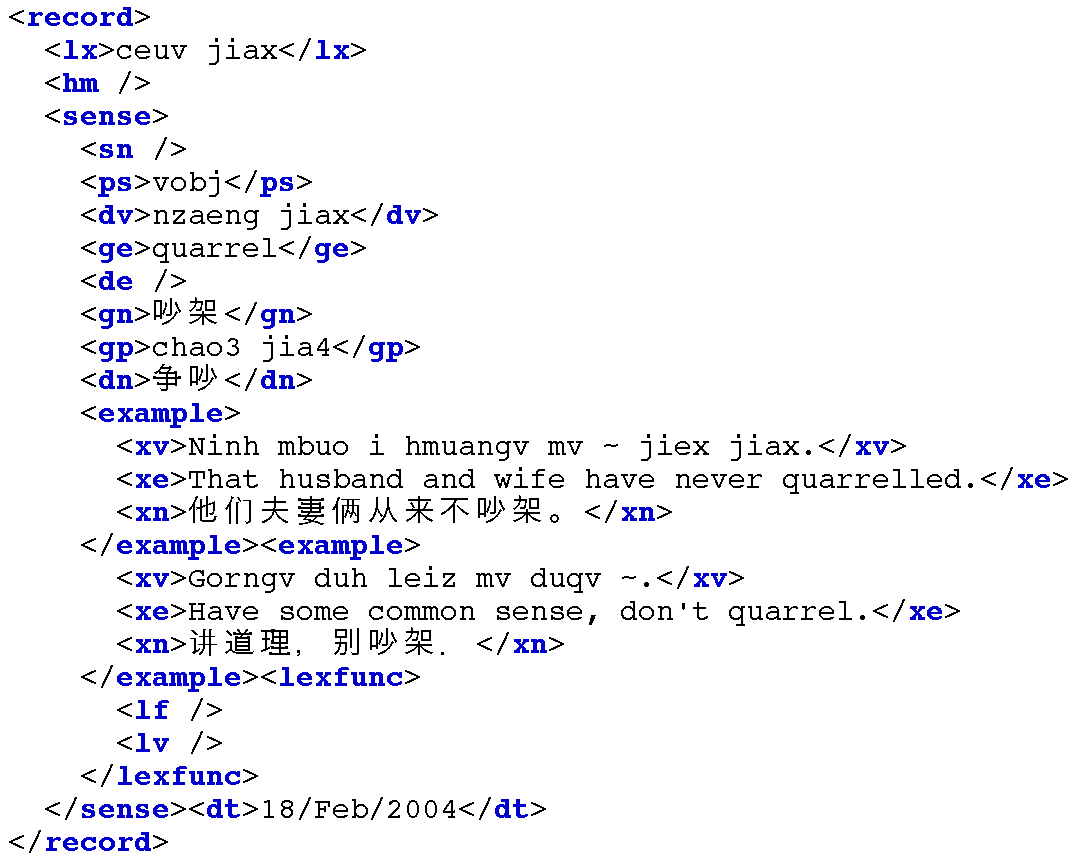

图 5.4：一个词条的XML表示，对Toolbox记录的词块分析的结果

## 6 使用OLAC元数据描述语言资源

NLP社区的成员的一个共同需要是发现具有很高精度和召回率的语言资源。数字图书馆社区目前已开发的解决方案包括元数据聚集。

<a href="#6.1-什么是元数据">6.1 什么是元数据？</a>

<a href="#6.2-OLAC开放语言档案社区">6.2 OLAC:开放语言档案社区</a>

<a href="#6.3-传播语言资源">6.3 传播语言资源</a>

**vscode jupyter toc**

<a href="#61-什么是元数据">6.1 什么是元数据？</a>

<a href="#62-OLAC开放语言档案社区">6.2 OLAC:开放语言档案社区</a>

<a href="#63-传播语言资源">6.3 传播语言资源</a>

## 6.1 什么是元数据

元数据最简单的定义是“关于数据的结构化数据”。元数据是对象或资源的描述信息，无论是物理的还是电子的。而术语“元数据”本身是相对较新的，只要收集的信息被组织起来，元数据下面隐含的意义却一直在被使用。图书馆目录是一种行之有效的元数据类型；它们已经作为资源管理和发现工具有几十年了。元数据可以由“手工”产生也可以使用软件自动生成。

都柏林核心元数据倡议于1995 年开始开发在网络上进行资源发现的约定。都柏林核心元数据元素表示一个广泛的、跨学科一致的元素核心集合，这些元素核心集合有可能对资源发现有广泛作用。都柏林核心由15个元数据元素组成，其中每个元素都是可选的和可重复的，它们是：标题，创建者，主题，描述，发布者，参与者，日期，类型，格式，标识符，来源，语言，关系，覆盖范围和版权。此元数据集可以用来描述数字或传统的格式中存放的资源。

开放档案倡议（OAI）提供了一个跨越数字化的学术资料库的共同框架，不考虑资源的类型，包括文档，资料，软件，录音，实物制品，数码代替品等等。每个库由一个网络访问服务器提供归档项目的公共访问。每个项目都有一个唯一的标识符，并与都柏林核心元数据记录（也可以是其他格式的记录）关联。OAI为元数据搜索服务定义了一个协议来“收获”资源库的内容。

## 6.2 OLAC开放语言档案社区

开放语言档案社区（OLAC）是正在创建的一个世界性语言资源的虚拟图书馆的机构和个人的国际伙伴关系：（i）制订目前最好的关于语言资源的数字归档实施的共识，（ii ）开发存储和访问这些资源的互操作信息库和服务的网络。OLAC在网上的主页是`http://www.language-archives.org/`。

OLAC元数据是描述语言资源的标准。通过限制某些元数据元素的值为使用受控词表中的术语，确保跨库描述的统一性。OLAC元数据可用于描述物理和数字格式的数据和工具。OLAC元数据扩展了都柏林核心元数据集（一个描述所有类型的资源被广泛接受的标准）。对这个核心集，OLAC添加了语言资源的基本属性，如主题语言和语言类型。下面是一个完整的OLAC记录的例子：

```
<?xml version="1.0" encoding="UTF-8"?>
<olac:olac xmlns:olac="http://www.language-archives.org/OLAC/1.1/"
           xmlns="http://purl.org/dc/elements/1.1/"
           xmlns:dcterms="http://purl.org/dc/terms/"
           xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
           xsi:schemaLocation="http://www.language-archives.org/OLAC/1.1/
                http://www.language-archives.org/OLAC/1.1/olac.xsd">
  <title>A grammar of Kayardild. With comparative notes on Tangkic.</title>
  <creator>Evans, Nicholas D.</creator>
  <subject>Kayardild grammar</subject>
  <subject xsi:type="olac:language" olac:code="gyd">Kayardild</subject>
  <language xsi:type="olac:language" olac:code="en">English</language>
  <description>Kayardild Grammar (ISBN 3110127954)</description>
  <publisher>Berlin - Mouton de Gruyter</publisher>
  <contributor xsi:type="olac:role" olac:code="author">Nicholas Evans</contributor>
  <format>hardcover, 837 pages</format>
  <relation>related to ISBN 0646119966</relation>
  <coverage>Australia</coverage>
  <type xsi:type="olac:linguistic-type" olac:code="language_description"/>
  <type xsi:type="dcterms:DCMIType">Text</type>
</olac:olac>
```

## 6.3 传播语言资源

语言数据财团存放NLTK数据存储库，一个开发的归档，社区成员可以上传语料库和保存好的模型。这些资源可以使用NLTK的下载工具方便地访问。

## 7 小结

- 大多数语料库中基本数据类型是已标注的文本和词汇。文本有时间结构，而词汇有记录结构。
- 语料库的生命周期，包括数据收集、标注、质量控制以及发布。发布后生命周期仍然继续，因为语料库会在研究过程中被修改和丰富。
- 语料库开发包括捕捉语言使用的代表性的样本与使用任何一个来源或文体都有足够的材料之间的平衡；增加变量的维度通常由于资源的限制而不可行。
- XML提供了一种有用的语言数据的存储和交换格式，但解决普遍存在的数据建模问题没有捷径。
- Toolbox 格式被广泛使用在语言记录项目中；我们可以编写程序来支持Toolbox文件的维护，将它们转换成XML。
- 开放语言档案社区（OLAC）提供了一个用于记录和发现语言资源的基础设施。

## 8 深入阅读

本章的附加材料发布在`http://nltk.org/`，包括网络上免费提供的资源的链接。

语言学语料库的首要来源是*语言数据联盟*和*欧洲语言资源局*，两者都有广泛的在线目录。本书中提到的主要语料库的细节也有介绍：美国国家语料库[(Reppen, Ide, & Suderman, 2005)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#reppen2005anc)、英国国家语料库[({BNC}, 1999)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#bnc1999)，Thesaurus Linguae Graecae[({TLG}, 1999)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#tlg1999)、儿童语言数据交换系统 (CHILDES) [(MacWhinney, 1995)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#macwhinney1995childes)和TIMIT[(S., Lamel, & William, 1986)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#garofolo1986timit)。

计算语言学协会定期组织研讨会发布论文集，它的两个特别兴趣组：SIGWAC和SIGANN；前者推动使用网络作为语料，发起去除HTML标记的CLEANEVAL 任务；后者鼓励对语言注解的互操作性的努力。

[(Buseman, Buseman, & Early, 1996)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#buseman1996shoebox)提供Toolbox数据格式的全部细节，最新的发布可以从`http://www.sil.org/computing/toolbox/`免费下载。构建一个Toolbox词典的过程指南参见`http://www.sil.org/computing/ddp/`。我们在Toolbox上努力的更多的例子记录在[(Tamanji, Hirotani, & Hall, 1999)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#bird1999nels)和[(Robinson, Aumann, & Bird, 2007)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#robinson2007toolbox)。[(Bird & Simons, 2003)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#bird2003portability)调查了语言数据管理的几十个其他工具。也请参阅关于文化遗产数据的语言技术的LaTeCH研讨会的论文集。

有很多优秀的XML资源（如`http://zvon.org/`）和编写Python程序处理XML的资源。许多编辑器都有XML模式。XML格式的词汇信息包括OLIF`http://www.olif.net/`和LIFT`http://code.google.com/p/lift-standard/`。

对于语言标注软件的调查，见`http://www.ldc.upenn.edu/annotation/`的*语言标注页*。对峙注解最初的提出是[(Thompson & McKelvie, 1997)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#thompson1997standoff)。语言标注的一个抽象的数据模型称为“标注图”在[(Bird & Liberman, 2001)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#bird2001annotation)提出。语言描述的一个通用本体（GOLD）记录在`http://www.linguistics-ontology.org/`中。

有关规划和建设语料库的指导，请参阅[(Meyer, 2002)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#meyer2002)和[(Farghaly, 2003)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#farghaly2003) 。关于标注者之间一致性得分的方法的更多细节，见[(Artstein & Poesio, 2008)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#artsteinpoesio2008)和[(Pevzner & Hearst, 2002)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#pevzner2002windowdiff)。

Rotokas数据由Stuart Robinson 提供，勉方言数据由Greg Aumann提供。

有关开放语言档案社区的更多信息，请访问`http://www.language-archives.org/`，或参见[(Simons & Bird, 2003)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#simonsbird2003llc)。

## 9 练习

1. ◑ 在[5.1](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#code-add-cv-field)中新字段出现在条目底部。修改这个程序使它就在`lx`字段后面插入新的子元素。（提示：使用`Element('cv')`创建新的`cv`字段，分配给它一个文本值，然后使用父元素的`insert()`方法。）

2. ◑ 编写一个函数，从一个词汇条目删除指定的字段。（我们可以在把数据给别人之前用它做些清洁，如删除包含无关或不确定的内容的字段。）

3. ◑ 写一个程序，扫描一个HTML字典文件，找出具有非法词性字段的条目，并报告每个条目的*核心词*。

4. ◑ 写一个程序，找出所有出现少于10次的词性（`ps`字段）。或许有打字错误？

5. ◑ We saw a method for discovering cases of whole-word reduplication. Write a function to find words that may contain partial reduplication. Use the `re.search()` method, and the following regular expression: `(..+)\1`

6. ◑ 我们看到一个增加`cv`字段的方法。一件有趣的问题是当有人修改的`lx`字段的内容时，保持这个字段始终最新。为这个程序写一个版本，添加`cv`字段，取代所有现有的`cv`字段。

7. ◑ 写一个函数，添加一个新的字段`syl`，计数一个词中的音节数。

8. ◑ 写一个函数，显示一个词位的完整条目。当词位拼写错误时，它应该显示拼写最相似的词位的条目。

9. ◑ 写一个函数，从一个词典中找出最频繁的连续字段对（如`ps`后面往往是`pt`）。（这可以帮助我们发现一些词条的结构。）

10. ◑ 使用办公软件创建一个电子表格，每行包含一个词条，包括一个中心词，词性和注释。以CSV格式保存电子表格。写Python代码来读取CSV文件并以Toolbox格式输出，使用`lx`表示中心词，`ps`表示词性，`gl`表示注释。

11. ◑ 在`nltk.Index`帮助下，索引莎士比亚的戏剧中的词。产生的数据结构允许按单个词查找，如music，返回演出、场景和台词的引用的列表，`[(3, 2, 9), (5, 1, 23), ...]`的形式，其中`(3, 2, 9)`表示第3场演出场景2台词9。

12. ◑ 构建一个条件频率分布记录《威尼斯商人》中每段台词的词长，以角色名字为条件，如`cfd['PORTIA'][12]`会给我们Portia的12个词的台词的数目。

13. ★ 获取CSV 格式的比较词表，写一个程序，输出相互之间至少有三个编辑距离的同源词。

14. ★ 建立一个出现在例句的词位的索引。假设对于一个给定条目的词位是*w*。然后为这个条目添加一个单独的交叉引用字段`xrf`，引用其它有例句包含*w*的条目的中心词。对所有条目做这个，结果保存为Toolbox格式文件。

15. ◑ 写一个递归函数将任意树转换为对应的XML，其中非终结符不能表示成XML元素，叶子表示文本内容，如:

    ```xml
    <S>
      <NP type="SBJ">
        <NP>
          <NNP>Pierre</NNP>
          <NNP>Vinken</NNP>
        </NP>
        <COMMA>,</COMMA>
    ```